# Project 1- Decesion Tree for Fair Face Analysis Bias

In [1]:
import os
import sys

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore') # wanting to stop showing all depreciated warnings and future warnings 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# Load Data 
label_train = pd.read_csv("C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\fairface_label_train.csv")
label_val = pd.read_csv('C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\fairface_label_val.csv')

In [3]:
label_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          10954 non-null  object
 1   age           10954 non-null  object
 2   gender        10954 non-null  object
 3   race          10954 non-null  object
 4   service_test  10954 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 353.1+ KB


In [4]:
label_val.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [5]:
label_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB


In [6]:
label_train.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [7]:
train_emb = pd.read_csv("C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\train_embeddings.csv")
test_emb = pd.read_csv("C:\\Users\\price\\Documents\\GitHub\\DATA6550-Bias\\Data\\test_embeddings.csv")

In [8]:
train_emb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Columns: 515 entries, feat_0 to race_gender
dtypes: float64(512), object(3)
memory usage: 340.8+ MB


In [9]:
train_emb.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [10]:
test_emb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Columns: 515 entries, feat_0 to race_gender
dtypes: float64(512), object(3)
memory usage: 43.0+ MB


In [11]:
test_emb.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [12]:
# train test split the data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

### Decsion Tree Model for Predicting Gender

In [13]:
X = train_emb.drop(columns=['gender', 'race', 'race_gender'])
y = train_emb['gender']

In [14]:
y = pd.get_dummies(y, drop_first=True)

In [15]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y,test_size=.20, train_size=0.80, random_state=42)

In [16]:
dt = DecisionTreeClassifier(random_state=6500)
model_g =dt.fit(X_train_g, y_train_g)
model_g

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,6500
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
pred_g = model_g.predict(X_test_g)

In [18]:
print('Accuracy Score of Decsion Tree on Test Set: ',model_g.score(X_test_g, y_test_g))
print('Accuracy Score of Decsion Tree on Training Set: ',model_g.score(X_train_g, y_train_g))

Accuracy Score of Decsion Tree on Test Set:  0.6518531327454032
Accuracy Score of Decsion Tree on Training Set:  0.9999855897398948


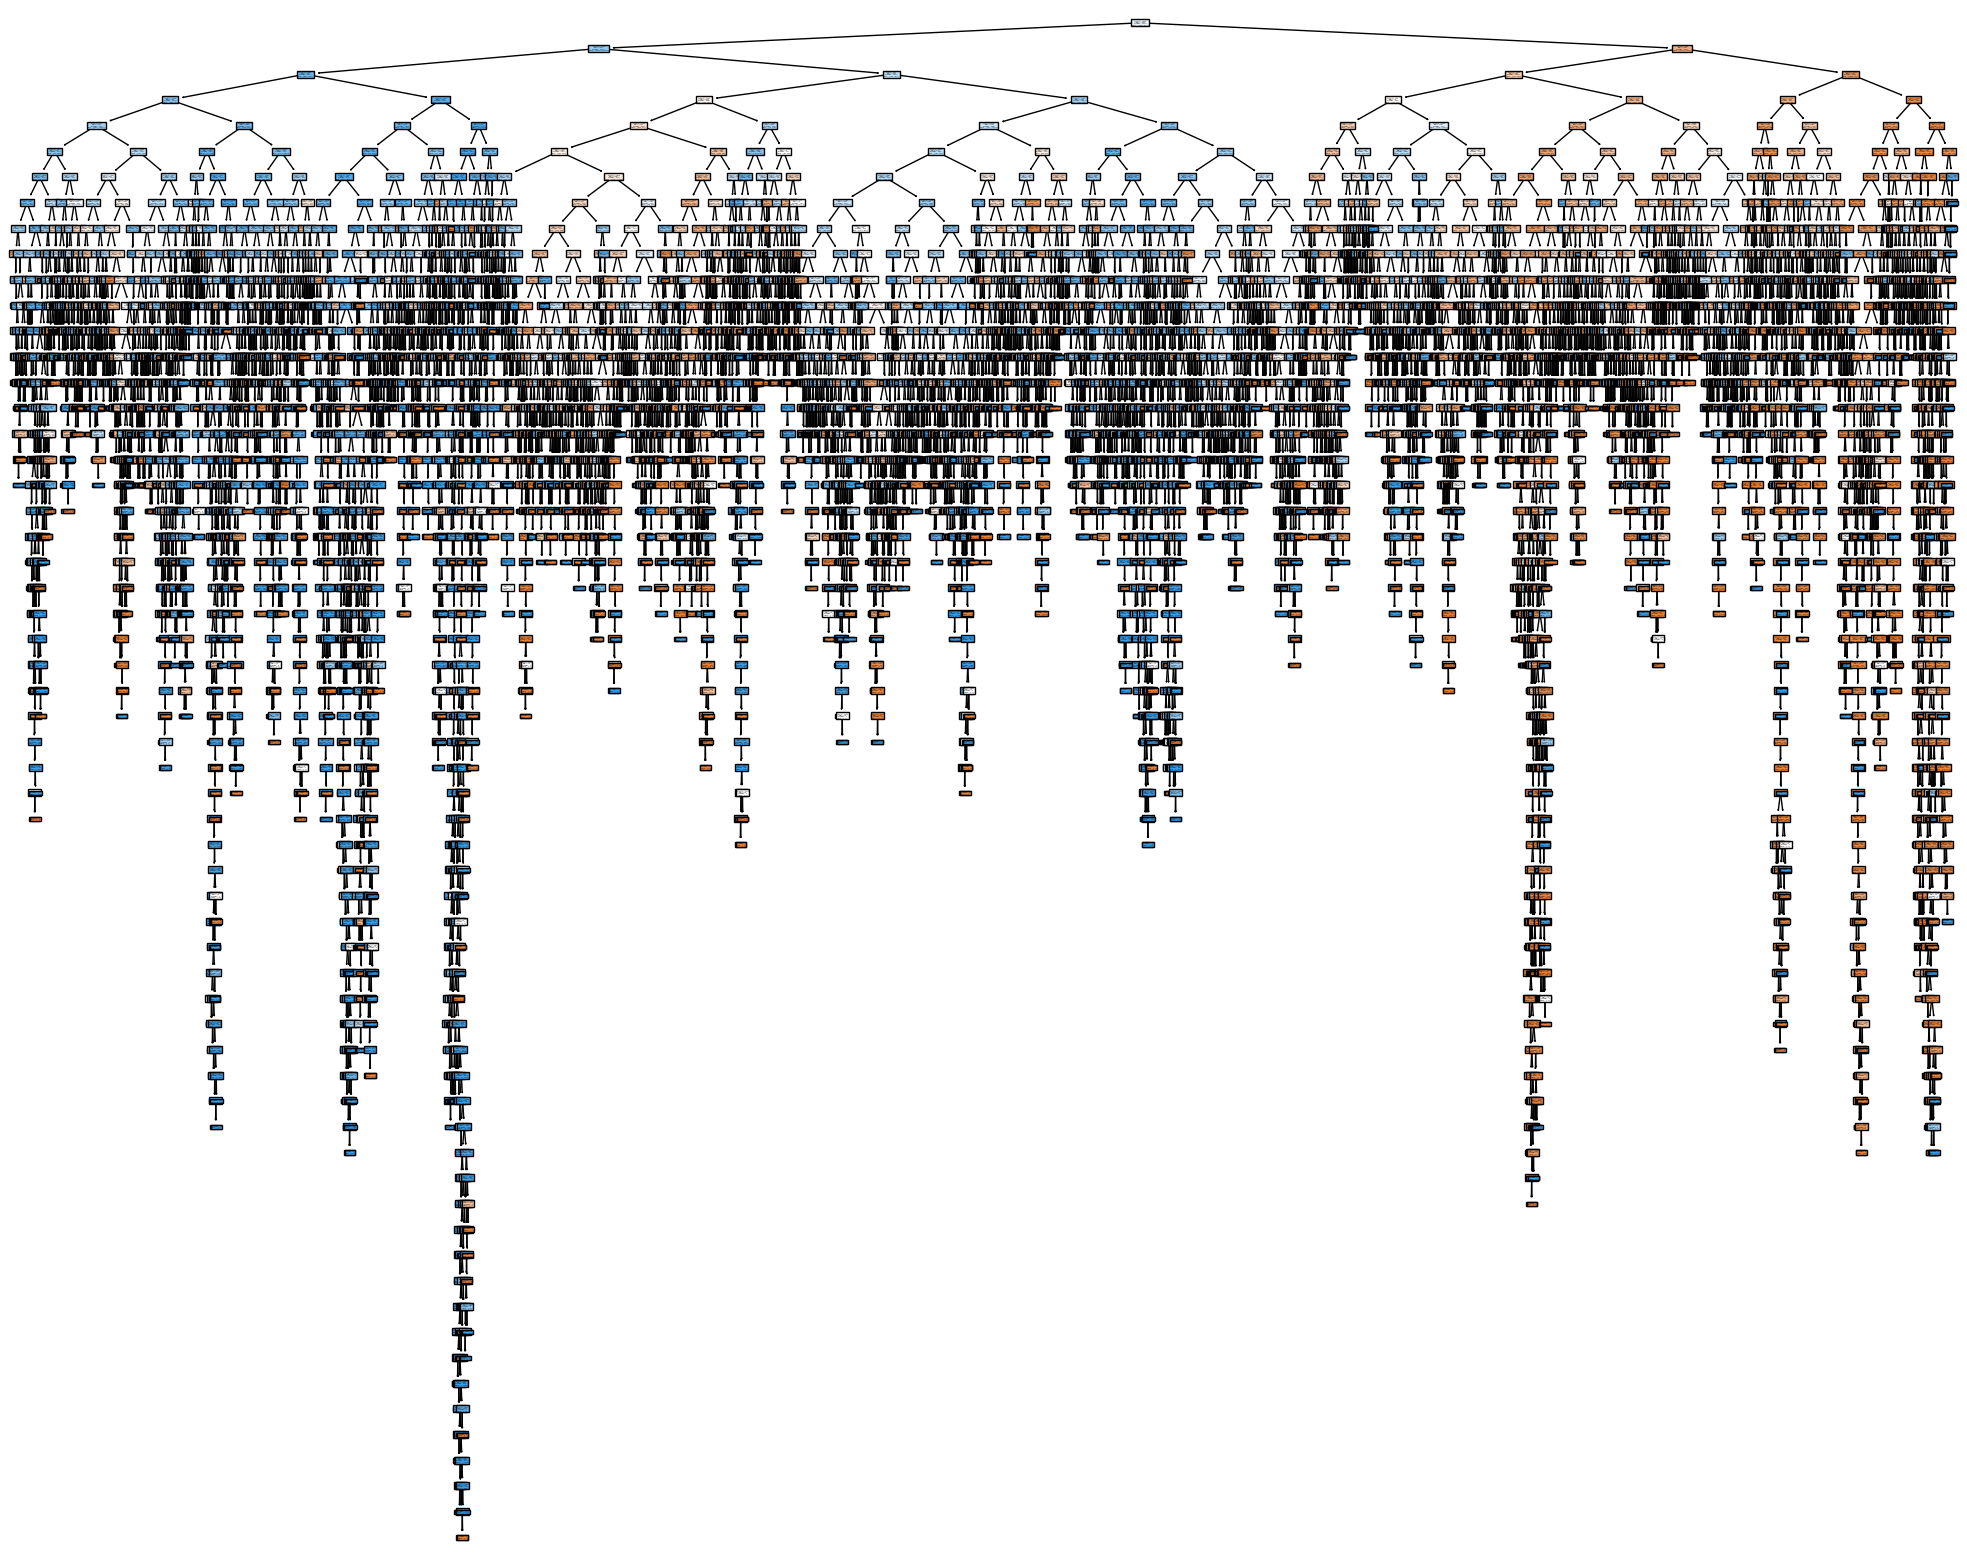

In [19]:
fig = plt.figure(figsize=(25,20))
_=plot_tree(model_g, filled=True)

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
def modeltraintest(vartrain, vartest, y_train, y_test, model):
    model.fit(vartrain, y_train)
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)
    score = model.score(vartest, y_test)
    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")
    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")
    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show();
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')
    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)
    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
# using the modeltraintest that was in Senario 8 and 7 from the Pridective Modeling class 6320 MTSU

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.651853

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[5191 2914]
 [3126 6118]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

       False       0.62      0.64      0.63      8105
        True       0.68      0.66      0.67      9244

    accuracy                           0.65     17349
   macro avg       0.65      0.65      0.65     17349
weighted avg       0.65      0.65      0.65     17349


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



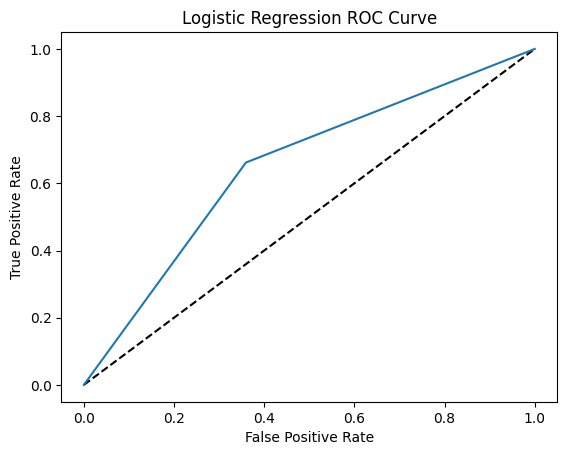

ROC AUC Score: 0.6512

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.65271273 0.6563153  0.65617119 0.64385042 0.65436991]

CV ROC AUC:
[0.65185877 0.65527647 0.65526503 0.64276948 0.65311274]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [21]:
modeltraintest(X_train_g, X_test_g, y_train_g, y_test_g, model_g)

In [22]:
df_pred_g = pd.DataFrame(pred_g, columns=['gender_pred'])

In [23]:
df_model_results_g = pd.concat([X_test_g, y_test_g], axis = 1 )
df_model_results_g = df_model_results_g.reset_index()
df_model_results_g = pd.concat([df_model_results_g, df_pred_g], axis = 1 )

display(df_pred_g.head())
df_model_results_g.head()

,gender_pred
0,True
1,True
2,False
3,False
4,True


,index,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455

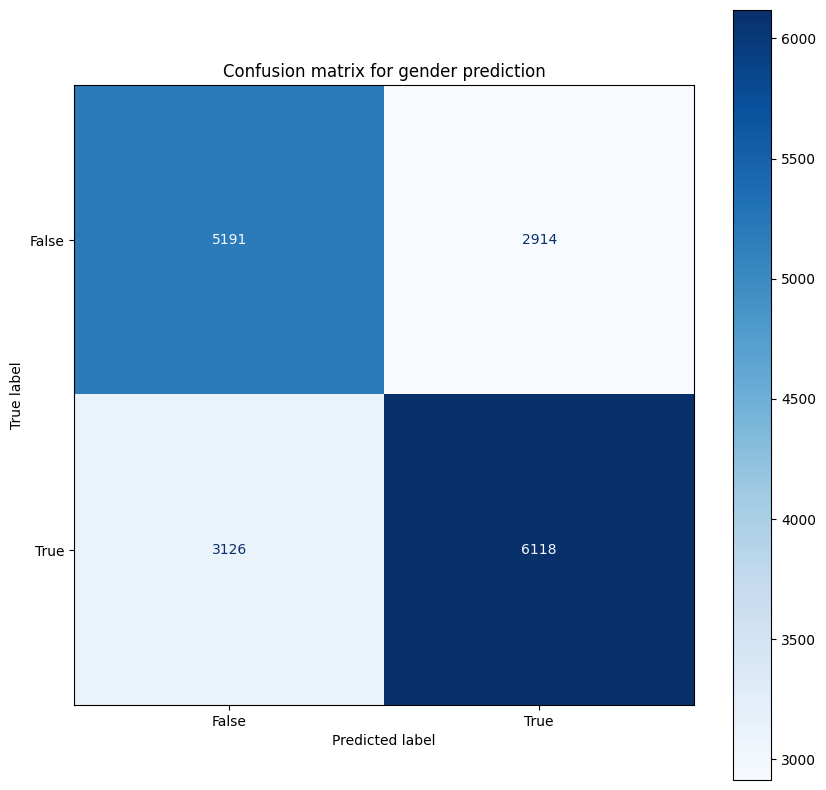

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))
confmat = ConfusionMatrixDisplay.from_estimator(model_g, X_test_g, y_test_g,
                                                cmap="Blues", values_format='d', ax=ax)
plt.title('Confusion matrix for gender prediction')
plt.show()

In [25]:
df_model_results_g['Missmatch']= df_model_results_g['male'] != df_model_results_g['gender_pred']

In [26]:
df_model_results_g.head()

,index,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455

In [27]:
correlation_matrix = df_model_results_g.corr().abs()
masked = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
sorted_pairs = masked.unstack().sort_values(ascending=False)
sorted_pairs.head(50)



feat_241  feat_233    0.670677
          feat_200    0.657826
feat_481  feat_56     0.646097
feat_397  feat_95     0.637696
feat_289  feat_11     0.631205
feat_279  feat_99     0.628315
feat_506  feat_163    0.624160
feat_233  feat_169    0.617800
feat_241  feat_95     0.598844
feat_406  feat_241    0.593759
feat_219  feat_94     0.588674
feat_279  feat_56     0.584971
feat_241  feat_169    0.583938
feat_403  feat_11     0.579565
feat_381  feat_200    0.578039
feat_233  feat_200    0.576939
feat_169  feat_95     0.576450
feat_491  feat_268    0.573753
feat_381  feat_241    0.559527
feat_400  feat_297    0.549327
feat_397  feat_233    0.549140
feat_163  feat_117    0.549025
feat_345  feat_233    0.546585
feat_112  feat_0      0.543699
feat_300  feat_163    0.542313
feat_219  feat_153    0.539064
feat_403  feat_289    0.537144
feat_302  feat_246    0.536984
feat_475  feat_6      0.536556
feat_397  feat_241    0.536246
feat_307  feat_0      0.535102
feat_341  feat_84     0.534895
feat_291

In [28]:
df_incorrect_gender = df_model_results_g[df_model_results_g['Missmatch'] == True]
df_incorrect_gender.head()


,index,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455

In [29]:
df_incorrect_gender = df_incorrect_gender[['index', 'male', 'gender_pred', 'Missmatch']]
df_incorrect_gender.head()

,index,male,gender_pred,Missmatch
3,32129,True,False,True
5,37139,True,False,True
6,85754,True,False,True
8,67832,False,True,True
11,62094,True,False,True


In [30]:
df_incorrect_gender.value_counts(df_incorrect_gender['male'] == False)

# The most incorrect predictions are female where there is some bias in the model most likely because there are more men and women in the training data and
# model is not able to understand the diffrences from women and men for not enough samples and data to learn from. 

male
False    3126
True     2914
Name: count, dtype: int64

### Decision Tree Model to predict Race

In [31]:
X = train_emb.drop(columns=['gender', 'race', 'race_gender'])
y = train_emb['race']
y = pd.DataFrame(y)
y = y['race'].replace({'white': 0, 'black': 1, 'latino_hispanic': 2, 'east asian': 3, 'southeast asian': 4, 'indian': 5, 'middle eastern': 6})

In [32]:
y.value_counts()

race
0    16527
2    13367
5    12319
3    12287
1    12233
4    10795
6     9216
Name: count, dtype: int64

In [33]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,y,test_size=.20, train_size=0.80, random_state=42)

In [34]:
display(y_test_r.value_counts())


race
0    3392
2    2727
5    2451
3    2439
1    2427
4    2073
6    1840
Name: count, dtype: int64

In [35]:
dt = DecisionTreeClassifier(random_state=6500)
model_r = dt.fit(X_train_r, y_train_r)
model_r

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,6500
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
pred_r = model_r.predict(X_test_r)

In [37]:
print('Accuracy Score of Decsion Tree on Test Set: ',model_r.score(X_test_r, y_test_r))
print('Accuracy Score of Decsion Tree on Training Set: ',model_r.score(X_train_r, y_train_r))

Accuracy Score of Decsion Tree on Test Set:  0.21430630007493226
Accuracy Score of Decsion Tree on Training Set:  0.9998703076590533


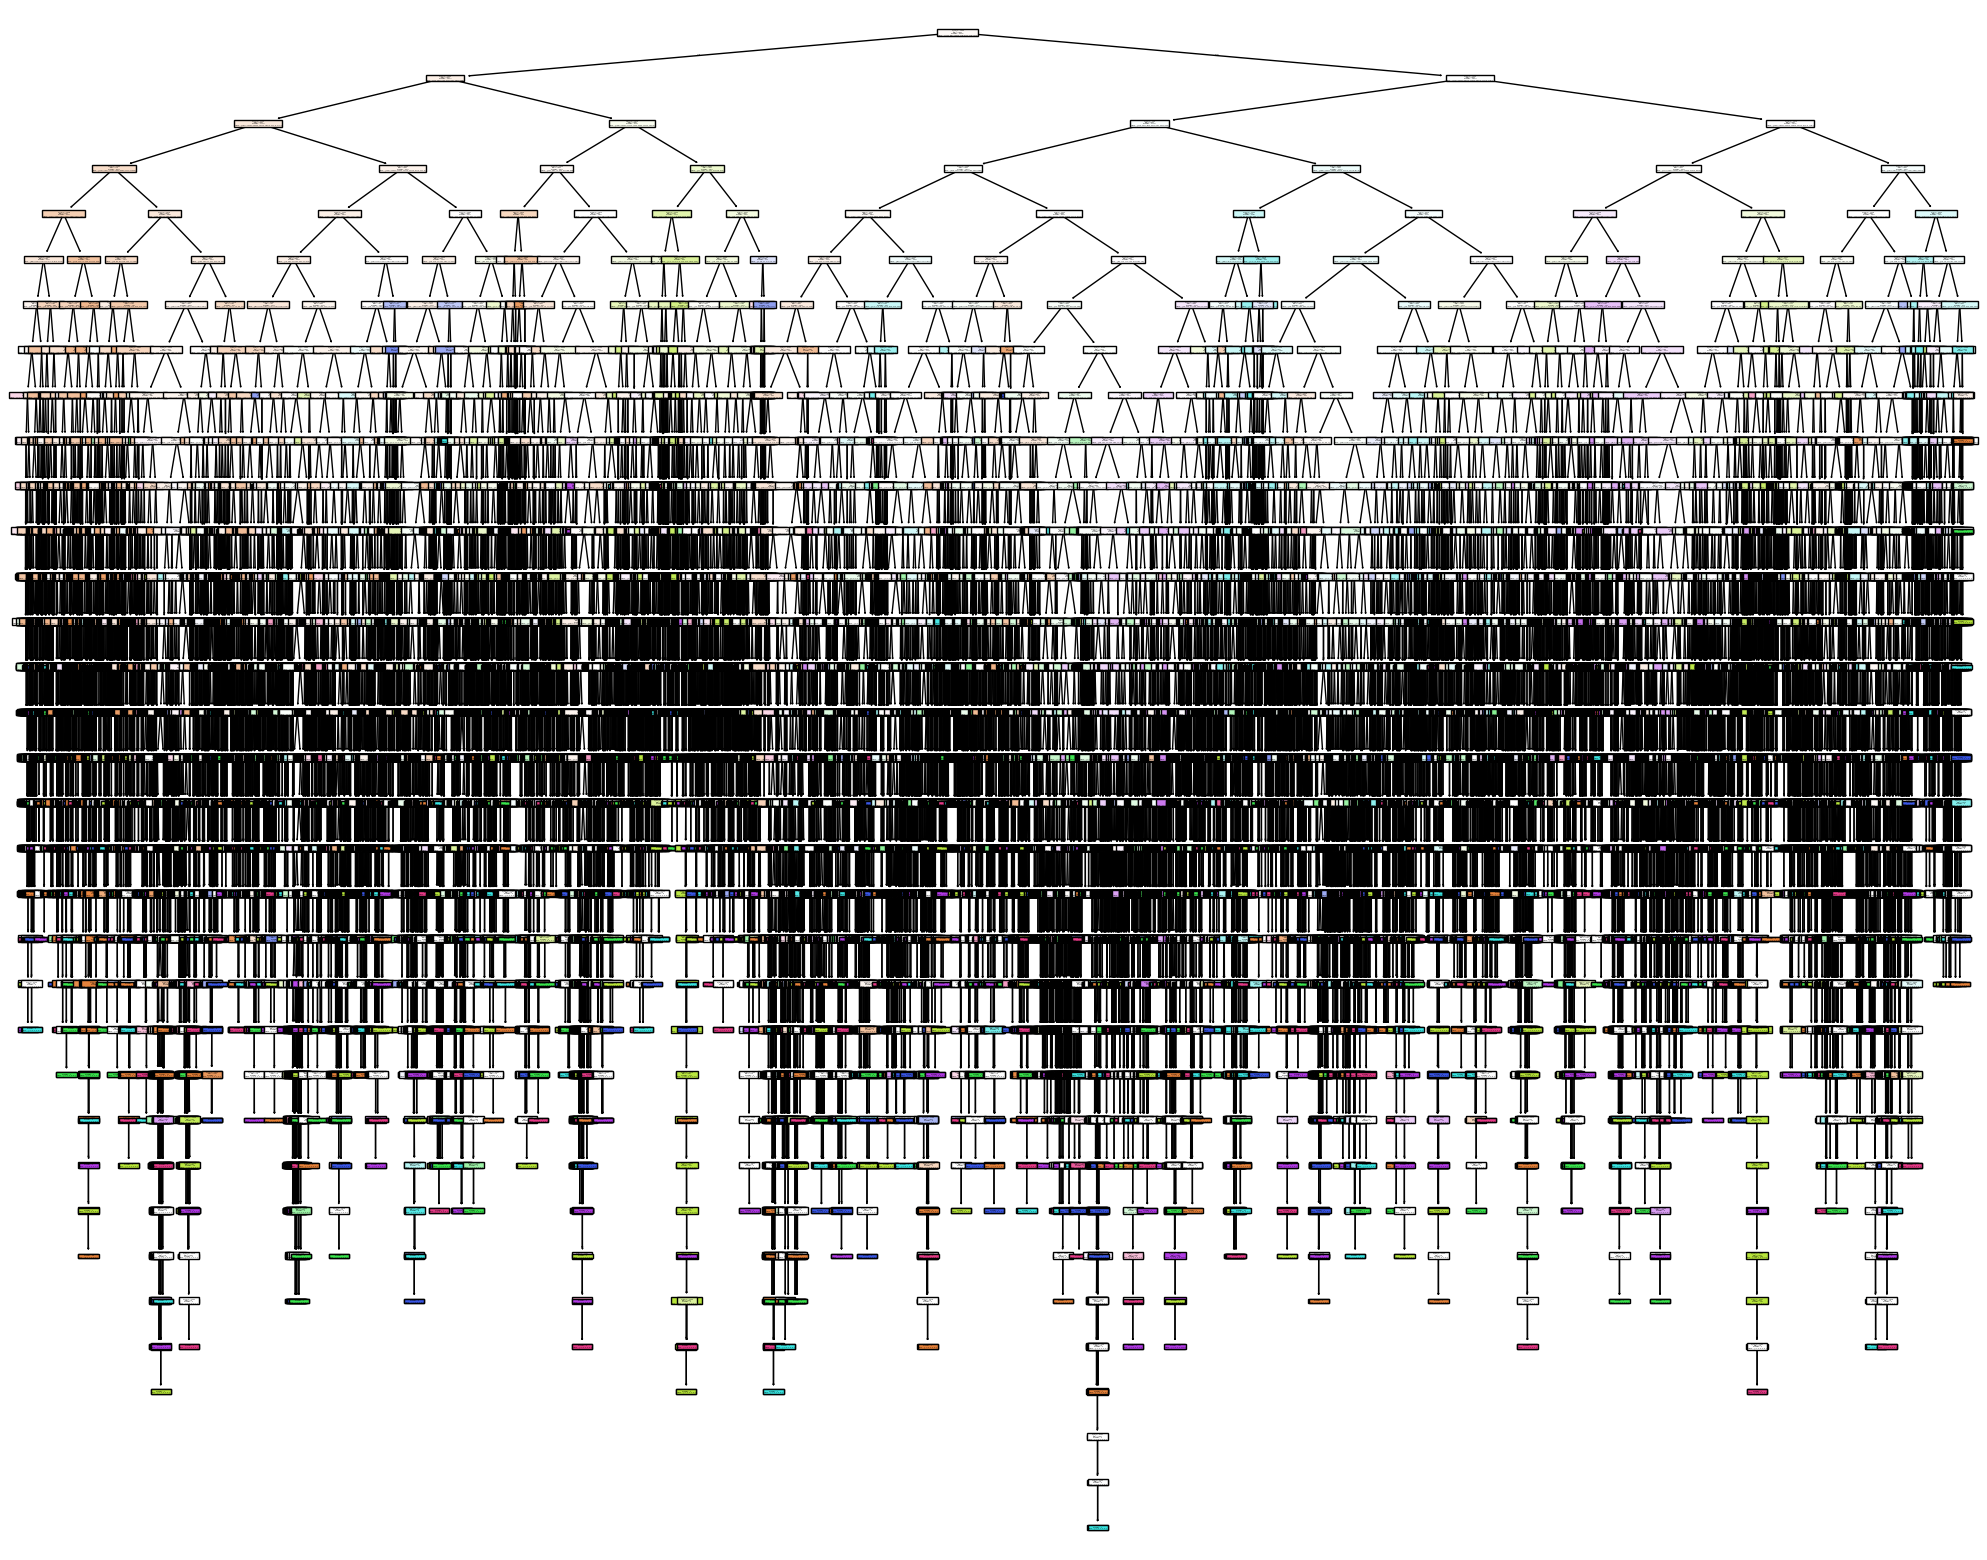

In [38]:
fig = plt.figure(figsize=(25,20))
_=plot_tree(model_r, filled=True)

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize


def modeltraintestmulti(vartrain, vartest, y_train, y_test, model):
    model.fit(vartrain, y_train)
    model_pred = model.predict(vartest)
    if hasattr(model, "predict_proba"):
        model_prob = model.predict_proba(vartest)
        classes_ = model.classes_
    else:
        model_prob = None
        classes_ = np.unique(y_train)

    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")
    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")
    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')
    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')

    if model_prob is None:
        print("Model does not support predict_proba; skipping ROC/AUC chart.")
        print('')
    else:
        y_test_bin = label_binarize(y_test, classes=classes_)
        n_classes = y_test_bin.shape[1]

        plt.plot([0, 1], [0, 1], 'k--')
        for i in range(n_classes):
            fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], model_prob[:, i])
            plt.plot(fpr, tpr, label=f'Class {classes_[i]}')

        fpr_micro, tpr_micro, thresholds_micro = roc_curve(y_test_bin.ravel(), model_prob.ravel())
        plt.plot(fpr_micro, tpr_micro, label='Micro-average', linewidth=2)

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multiclass ROC Curve (OvR)')
        plt.legend()
        plt.show();

        roc_auc_macro = roc_auc_score(y_test_bin, model_prob, average='macro', multi_class='ovr')
        roc_auc_weighted = roc_auc_score(y_test_bin, model_prob, average='weighted', multi_class='ovr')
        roc_auc_micro = roc_auc_score(y_test_bin, model_prob, average='micro')

        print('ROC AUC (OvR, macro): {0:.4f}'.format(roc_auc_macro))
        print('ROC AUC (OvR, weighted): {0:.4f}'.format(roc_auc_weighted))
        print('ROC AUC (micro): {0:.4f}'.format(roc_auc_micro))
        print('')

    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')

    cv_scores = cross_val_score(model, vartrain, y_train, cv=5, scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')


    if model_prob is None:
        print('CV ROC AUC:')
        print('Skipped (model has no predict_proba)')
        print('')
    else:
        try:
            cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5, scoring='roc_auc_ovr')
            print('CV ROC AUC:')
            print(cv_rocauc)
            print('')
        except Exception as e:
            print('CV ROC AUC:')
            print('Could not compute with scoring="roc_auc_ovr".')
            print(str(e))
            print('')

    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
# using the modeltraintest that was in Senario 8 and 7 from the Pridective Modeling class 6320 MTSU, also
# used ChatGPT to help write the code for the multiclass ROC/AUC part, kept getting errors and needed help to write the code


XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.214306

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[928 333 499 450 369 403 410]
 [346 667 301 239 298 361 215]
 [482 335 490 363 355 399 303]
 [443 211 352 539 358 299 237]
 [295 260 336 344 337 301 200]
 [317 339 428 315 300 492 260]
 [362 227 271 235 232 248 265]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.29      0.27      0.28      3392
           1       0.28      0.27      0.28      2427
           2       0.18      0.18      0.18      2727
           3       0.22      0.22      0.22      2439
           4       0.15      0.16      0.16      2073
           5       0.20      0.20      0.20      2451
           6       0.14      0.14      0.14      1840

    accuracy                           0.21     17349
   macro avg       0.21      0.21      0.21     17349
weighted avg       0.22      0.21      0.22     17349


XXXXXXXXXXXXXX ROC 

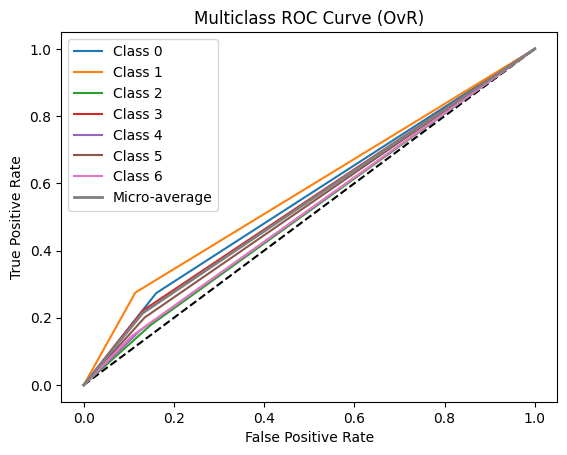

ROC AUC (OvR, macro): 0.5383
ROC AUC (OvR, weighted): 0.5399
ROC AUC (micro): 0.5417

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.21046185 0.20657108 0.2021039  0.2105339  0.2131998 ]

CV ROC AUC:
[0.5361324  0.53394195 0.53156632 0.53674238 0.53755257]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [40]:
modeltraintestmulti(X_train_r, X_test_r, y_train_r, y_test_r, model_r)

In [41]:
df_pred_r = pd.DataFrame(pred_r, columns=['race_pred'])

In [42]:
df_model_results_r = pd.concat([X_test_r, y_test_r], axis = 1 )
df_model_results_r = df_model_results_r.reset_index()
df_model_results_r = pd.concat([df_model_results_r, df_pred_r], axis = 1 )
display(df_pred_r.head())
df_model_results_r.head()
# 'white': 0, 'black': 1, 'latino_hispanic': 2, 'east asian': 3, 'southeast asian': 4, 'indian': 5, 'middle eastern': 6

,race_pred
0,5
1,4
2,4
3,1
4,1


,index,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455

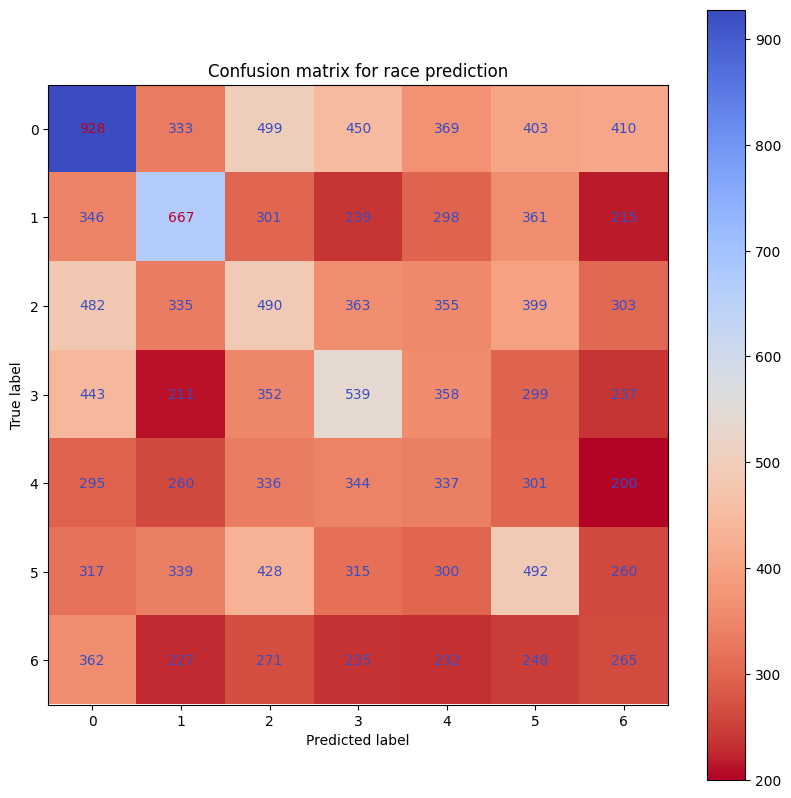

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 10))
confmat = ConfusionMatrixDisplay.from_estimator(model_r, X_test_r, y_test_r, cmap="coolwarm_r", values_format='d', ax=ax)
plt.title('Confusion matrix for race prediction')
plt.show()

In [44]:
df_model_results_r['Missmatch']= df_model_results_r['race'] != df_model_results_r['race_pred']
df_model_results_r_label = df_model_results_r.copy()
df_model_results_r_label['race_label'] = df_model_results_r_label['race'].replace({0: 'white', 1: 'black', 2: 'latino_hispanic', 3: 'east asian', 4: 'southeast asian', 5: 'indian', 6: 'middle eastern'})
df_model_results_r_label['race_pred_label'] = df_model_results_r_label['race_pred'].replace({0: 'white', 1: 'black', 2: 'latino_hispanic', 3: 'east asian', 4: 'southeast asian', 5: 'indian', 6: 'middle eastern'})
df_model_results_r_label = df_model_results_r_label[['index','race', 'race_label', 'race_pred', 'race_pred_label', 'Missmatch']]

In [45]:
display(df_model_results_r.head(10))
df_model_results_r_label.head(10)

,index,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455

,index,race,race_label,race_pred,race_pred_label,Missmatch
0,47413,6,middle eastern,5,indian,True
1,52263,6,middle eastern,4,southeast asian,True
2,21583,5,indian,4,southeast asian,True
3,32129,1,black,1,black,False
4,63300,5,indian,1,black,True
5,37139,2,latino_hispanic,3,east asian,True
6,85754,3,east asian,3,east asian,False
7,28073,2,latino_hispanic,2,latino_hispanic,False
8,67832,6,middle eastern,5,indian,True
9,83180,0,white,4,southeast asian,True


In [46]:
correlation_matrix_r = df_model_results_r.corr().abs()
masked_r = correlation_matrix_r.where(np.triu(np.ones(correlation_matrix_r.shape), k=1).astype(bool))
sorted_pairs_r = masked_r.unstack().sort_values(ascending=False)
sorted_pairs_r.head(10)


feat_241  feat_233    0.670677
          feat_200    0.657826
feat_481  feat_56     0.646097
feat_397  feat_95     0.637696
feat_289  feat_11     0.631205
feat_279  feat_99     0.628315
feat_506  feat_163    0.624160
feat_233  feat_169    0.617800
feat_241  feat_95     0.598844
feat_406  feat_241    0.593759
dtype: float64

In [47]:
sorted_pairs.head(10)

feat_241  feat_233    0.670677
          feat_200    0.657826
feat_481  feat_56     0.646097
feat_397  feat_95     0.637696
feat_289  feat_11     0.631205
feat_279  feat_99     0.628315
feat_506  feat_163    0.624160
feat_233  feat_169    0.617800
feat_241  feat_95     0.598844
feat_406  feat_241    0.593759
dtype: float64